# Drug Review Data Science

### Author : Avash Monajemi

## (1) Background Information

### 1.1 Introduction to Drug Reviews

This dataset is regarding 215063 observations of drug reviews and other variables that provide additional information to their review.

##### How was this data created?
- The answer is through web scraping. Web scraping is the act of gathering specific data and copying it from the web into a database or spreadsheet for purposes of data analysis. To explain further, all of the information and variables in this dataset are located somewhere on the web page of reviews and is compiled into distinct columns of information. Members of the UCI machine learning repository are acredited for creating this dataset by looking through pharmaceutical review sites and web scraping relevant information.

##### What is a drug review anyway?
-  A drug review notes a patient's critique of a drug they consumed. A patient decides to use a drug to stabilize symptoms (physical or mental characteristics) due to their condition/disease, and they make a note of reactions to the drug & effectiveness in curing symptoms related to their condition. Thus, drug reviews could potentially be of neutral language because some patients may have positive feelings regarding their drugs effectiveness to cure symptoms of their current condition, but may be unhappy with the side effects. For example, the government of South Australia notes the importance of drug effects when they note, "sometimes unwanted side-effects may be produced and the potential benefits of the medicine need to be weighed up against the risk of side-effects" (Source: sahealth.sa.gov.au). For our data, we expect that most drug reviews will not be completely positive as they often have side effects.

-  **Example** : "I took this Bumex drug and it has been helping my high blood pressure condition for two weeks now! However, I am very upset with the side-effects as I have experienced slow muscle movements and intense fatigue."



### 1.2 Additional Variable Information / Importance

We have already explained the meaning and context behind a drug review which is 1 out of the 6 variables in our data. Now we will explain the supporting variables.


##### Drug Name
-  The drug name is simply the name of the drug that the patient consumed to treat their condition/disease. These drugs can be of different shapes and states such as liquids or solid tablets. More importantly, some patients used a combination drug which consists of two different drugs used together to treat a condition, and this is noted by a " / " in the variable.

-  **Example of drug forms** The drug Buprenorphine used to treat opiod addictions is given in the form of a tablet or pill.

-  **Example of combination drugs** In our data, there are cases where a patient used the combination drug Buprenorphine / naloxone instead of Buprenorphine alone. In fact, the condition of treating opiod addictions, it is common for patients to consume this combination drug after they had consumed Buprenorphine alone (Source: MayoClinic 2019).

##### Condition
-  Firstly, we must note that the term "Condition" in this variable comprises of many different types of disorders, diseases, illnesses, infections, syndromes, and the like. One key distinction between some conditions is curable vs. non-curable. Furthermore, there are key differences in these different types of conditions and understanding them could be very important to analyzing why patient's satisfaction level may be lower for one classification of condition than another.


-  **Example** A *syndrome* is a collection (1 or more) distinct symptoms that characterize a *disease*.


##### Rating
-  This variable is seen throughout many different discussions of topics or establishments. The rating of the drug essentially describes the satisfaction level out of 10 in this data. The Rating ranges from 1 to 10 and larger values represent higher satisfaction. There could be many factors or attributes that are correlated with rating and we will explore them further.


##### Date
-  This variable is very self-explanatory. The date column in this data shows the day, month, and year in which the review was written online. Why might this be important? There are relationships with seasons and health related measures and we can examine what these are.


##### Useful Count
-  The number of useful marks a drug review has indicates the number of people that found the review useful. Basically, if there are more useful marks we can regard that review as very useful, and those that have little to none may not be useful. However, it is very important to attach meaning to what "useful" might indicate when someone reads a review. We will explore this deeper later but for now a preliminary thought can be that patients regard a review as useful if they have discovered new or specific-patient related insight they did not know before


## (2) Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import sys
!{sys.executable} -m pip install pandasql
from pandasql import sqldf
from pandasql import *
import calendar
pysqldf = lambda q: sqldf(q, globals())

You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
Reviews1=pd.read_csv('drugsComTest_raw.csv')
Reviews1.shape

(53766, 7)

In [3]:
Reviews=pd.DataFrame(pysqldf("SELECT drugName,condition,review,rating,date,usefulCount FROM Reviews1;"))
Reviews.shape

(53766, 6)

In [4]:
Reviews.head(10)

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
5,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13
6,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1
7,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32
8,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21
9,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3


This data is the original form of the dataset that we will work with and modify through the remainder of the analyses.

### 2.1 Preliminary Text/Review Analyses

Our first analyses will focus on exploring the review text data and generating some summaries and visualizations

In [5]:
Reviews['word_count'] = Reviews['review'].apply(lambda x: len(str(x).split(" ")))
Reviews.word_count.describe()

count    53766.000000
mean        85.587751
std         44.767313
min          1.000000
25%         49.000000
50%         85.000000
75%        127.000000
max       1222.000000
Name: word_count, dtype: float64

The first point we should note in analyzing word count distributions is that a review having 1222 words is a very large text that is much larger, over 10 times larger, than the 75th percentile of word count which is 127. We can neglect this outlier for visualizing distributions. Furthermore, a review that is as large as 1222 words may not differ with respect to other measures as one that is already high enough at the 99.9th percentile.

[Text(0,0.5,'Respective Counts'), Text(0.5,0,'Rating')]

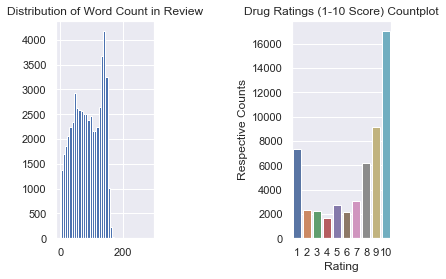

In [37]:
Reviews1=Reviews[Reviews.word_count <= Reviews.word_count.quantile(.9995)]
import matplotlib.pyplot as plt
plt.subplot(1, 3, 1)
Reviews1['word_count'].hist(bins=40)
plt.title("Distribution of Word Count in Review")
plt.subplot(1,3,3)
import seaborn as sns
ax = sns.countplot(x="rating", data=Reviews)
ax.set_title("Drug Ratings (1-10 Score) Countplot")
ax.set(xlabel='Rating',ylabel='Respective Counts')



The plot on the left shows the distribution of # words in the review. We notice the histogram is rather unimodal and has a clear peak at around 130 words representing the most common amount of words used in a review. It is rather difficult to tell if the distribution is skewed rightly or leftly, however since the median is ever so slightly less than the mean, the distribution can be considered as right skewed. The spread is from 0 to about 300 indiciated by the plot.

The plot on the right indicates the distribution of drug ratings. We see that most commonly, people are rating the drug very highly and probably effectively in the the range of 8 - 10 ratings, with 10/10 being the most common. The 4th most likely rating a drug user would give is the lowest rating : 1. Clearly there is a large seperation of ratings here.

We are curious whether there is a relationship between the rating and the average number of useful counts, as well as the rating and the average word counts used in their detailed review on the drug. 

[Text(0,0.5,'Average Word Count'), Text(0.5,0,'Rating')]

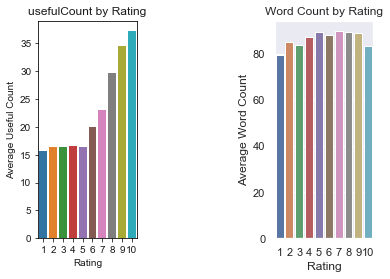

In [7]:
RatingUseful=pd.DataFrame(pysqldf("""SELECT rating, AVG(usefulCount) AS Average_usefulCount FROM Reviews GROUP BY rating"""))
plt.subplot(1,3,1)
ax = sns.barplot(x="rating", y="Average_usefulCount", data=RatingUseful)
ax.set_title("usefulCount by Rating")
ax.set(xlabel='Rating',ylabel='Average Useful Count')
import seaborn as sns; sns.set(color_codes=True)
WordCounts=pd.DataFrame(pysqldf("""SELECT rating, AVG(word_count) AS Average_WordCount FROM Reviews GROUP BY rating"""))
plt.subplot(1,3,3)
ax = sns.barplot(x="rating", y="Average_WordCount", data=WordCounts)
ax.set_title("Word Count by Rating")
ax.set(xlabel='Rating',ylabel='Average Word Count')



From above there is a clear relationship between the rating of the drug and the useful count. It seems that viewers tend to mark positively rated drugs as being useful more often than for drugs with a low rating. Furthermore, extreme ratings of 1 and 10 for the drug correspond to on average having shorter reviews by about 10 word in length compared to those with more neutral scores. This could be explained by the fact that reviews that are a mix of positive and negative feedback require longer arguments of explaining two sentiments than for those that are purely positive or negative.

We will now clean up our review data to construct a visualization of the common words reviewers use in their drug review

In [8]:
Reviews['review'] = Reviews['review'].apply(lambda y: " ".join(y.lower() for y in y.split()))  #Lower Case
Reviews['review'] = Reviews['review'].str.replace('[^\w\s]','')  #punctuation correction
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
Reviews['review']= Reviews['review'].apply(lambda y: " ".join(y for y in y.split() if y not in stop)) #Removing english stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Javacash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
new_stopwords = ['drug', 'doctor','feel','felt','would','started','tried','start','try','effect','effects', 'using','affect','medication','medicine','hurt','problem','treatment','symptom','week','month','day','took', 'take', 'months', 'days', 'weeks','like','used','use','well','know','prescribed','give','would','time','gave','pill']
Reviews['review']= Reviews['review'].apply(lambda y: " ".join(y for y in y.split() if y not in new_stopwords)) # We create extra stopwords too

In [10]:
Reviews["review"] = Reviews["review"].str.replace("[^a-zA-Z#]", " ") #Special Character Removals

In [11]:
freq = pd.Series(' '.join(Reviews["review"]).split()).value_counts()[:10]
Reviews["review"]= Reviews["review"].apply(lambda x: " ".join(x for x in x.split() if x not in freq.index)) #Removing the 10 most common words in the corpus
Reviews["review"].head()

0    antidepressants citalopram fluoxetine amitript...
1    son crohn disease done asacol complaints shows...
2                             quick reduction symptoms
3    contrave combines drugs alcohol smoking opioid...
4    birth control one cycle reading reviews type s...
Name: review, dtype: object

In [12]:
Reviews["review"] = Reviews["review"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) # Removing words of length <3

In [13]:
import nltk
nltk.download('wordnet')  #Lemmatization, or we can do stemming.
from textblob import Word
Reviews["review"]= Reviews["review"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
Reviews["review"].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Javacash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    antidepressant citalopram fluoxetine amitripty...
1    crohn disease done asacol complaint show taken...
2                              quick reduction symptom
3    contrave combine drug alcohol smoking opioid c...
4    birth control cycle reading review type simila...
Name: review, dtype: object

In [14]:
tokenized_Review = Reviews["review"].apply(lambda x: x.split())
tokenized_Review.head() #Tokenizing the reviews

0    [antidepressant, citalopram, fluoxetine, amitr...
1    [crohn, disease, done, asacol, complaint, show...
2                          [quick, reduction, symptom]
3    [contrave, combine, drug, alcohol, smoking, op...
4    [birth, control, cycle, reading, review, type,...
Name: review, dtype: object

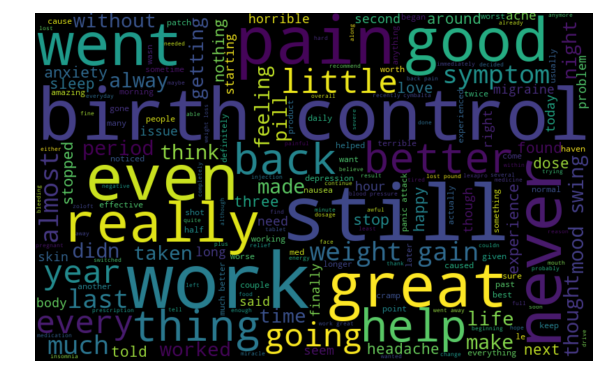

In [15]:
all_words = ' '.join([text for text in Reviews["review"]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

The visualization above is a lot to take in. This is called a word cloud. It shows the most common words that appear in the drug reviews after we have structured our text data in such a way that only relevant words will be used in this analysis. This is why you will not find "effect", "drug", or "medicine" in this visualization because they are too common to be recognized as meaningful, everybody uses these words in their review and so they are removed for this purpose. More significant words are larger in text and reflect higher counts of usage. We see that in particular, reviewers are complaining highly about mood wings (a common side effect many drugs create), weight gain, and panick attacks, and migranes. To describe these experiences, they are noting certain adjectives such as horrible. Reviewers also note positive words such as happy, much better, great, effective, and good luck which probably describe their positive experiences.

We should note finally that a word cloud is simply a preliminary exploration for diving in to see what reviewers are discussing in their reviews. It will not tell us in detail how a particular user felt about their drug intake experience, what the overall topic one is discussing, and more advanced information about the text. Will will conduct more detailed analysis following. 

### 2.2 Sentiment Analysis of Drug Reviews

Now we will provide sentiment analysis for the drug reviews. Sentiment analysis is a field that is part of Natural Language Processing (NLP) that uses algorithms to identify opinions in text data. Structuring text data and gaining actionable insight from it is very import in product analytics and to provide advanced product reccomendations in industry. Relevant information from sentiment analysis could be

- *Polarity* : Expressing a positive or negative opinion (scored on [-1,1])
- *Subject*  : The main topic that is being discussed

##### What are Opinions?

Because textual information can be easily seperated into facts vs opinions, we should properly define their differences first.

-  Facts are **objective** comments regarding a topic
-  Opinions are **subjective** in that they include a user's feeling and sentiments (usually in the form of adjectives) of a topic.

-  Example : **Fact** : This reccomended amount of duration to intake this drug is 3 weeks
-  Example : **Opinion** : The duration for taking this drug to cure my insomnia is too long!

##### Methods for expressing Opinions

There are a number of ways to express opinions and some may not seem obvious at first hand and sentiment analysis may have a harder time detecting these.

-  One can blunty state that Drug A is horrible, however they may also use comparison and say Drug B is better than Drug A.

-  Some opinions express facts, but at advanced level may be seen as opinions.
-  **Example** : "This drug made me feel so much better" vs "I only had to use the drug for one day". Both can be seen as positive, but the latter we expect could be harder to classify as positive.


##### How Sentiment Analysis Works

-  There are rule-based methods that analyze words in the text and identify the negative words and positive words. The count of these is then compared to see if  the overall sentiment is positive, negative, or neutral. 

-  There are automatic approaches that rely on machine learning techniques and it is modeled as a classification problem where the algorithm reads the text data and returns if it is positive, negative, or neutral.

-  In our approach, we will use the Textblob NLTK package to analyze the sentiments. It is based on a **Naive Bayes Classifier** that will be used to make the conclusions, and although we could train our own we will make it simple and use the one by default. 

##### Limitations

-  Because sentiment analysis is a hard process to classify a given text, it will not be correct 100% of the time. However, for general purpose usage, getting it incorrect around 20% of the time is something we must accept and it can still be valid to use it for exhibiting certain trends.

- For example, double negations in a text could be very misleading and is often hard to detect as negative or positive by the algorithm

In [16]:
from textblob import TextBlob
Reviews['sentiment'] = Reviews['review'].apply(lambda y: TextBlob(y).sentiment[0])

In [17]:
import datetime
Reviews['year'] = pd.DatetimeIndex(Reviews['date']).year
Reviews['month'] = pd.DatetimeIndex(Reviews['date']).month
Reviews['day'] = pd.DatetimeIndex(Reviews['date']).day

Reviews.head()


,drugName,condition,review,rating,date,usefulCount,word_count,sentiment,year,month,day
0,Mirtazapine,Depression,antidepressant citalopram fluoxetine amitripty...,10,28-Feb-12,22,68,-0.300000,2012,2,28
1,Mesalamine,"Crohn's Disease, Maintenance",crohn disease done asacol complaint show taken...,8,17-May-09,17,51,0.333333,2009,5,17
2,Bactrim,Urinary Tract Infection,quick reduction symptom,9,29-Sep-17,3,4,0.333333,2017,9,29
3,Contrave,Weight Loss,contrave combine drug alcohol smoking opioid c...,9,5-Mar-17,35,143,0.253125,2017,3,5
4,Cyclafem 1 / 35,Birth Control,birth control cycle reading review type simila...,9,22-Oct-15,4,149,0.248444,2015,10,22


Now that we have the sentiment scores in the range [-1,1] for all observations, we want to see what the relationship between sentiment scores and other important variables in this data are. It would be interesting to see if there is a special relationship between the year of the rating of the review and the average sentiment score. Similarly, we'd like to find the relationship between the year of the rating and the average rating score itself.

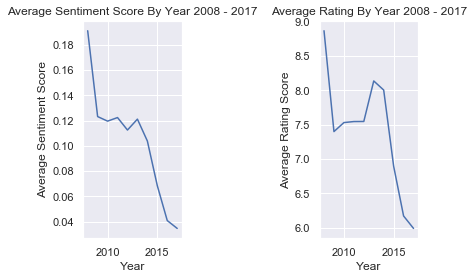

In [18]:
Sentiment_ByYear=pd.DataFrame(pysqldf("""SELECT year, AVG(sentiment) AS Average_Sentiment FROM Reviews GROUP BY year"""))
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.plot(Sentiment_ByYear.year, Sentiment_ByYear.Average_Sentiment)
plt.title('Average Sentiment Score By Year 2008 - 2017')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
Rating_ByYear=pd.DataFrame(pysqldf("""SELECT year, AVG(rating) AS Average_Rating FROM Reviews GROUP BY year"""))
plt.subplot(1,3,3)
plt.plot(Rating_ByYear.year,Rating_ByYear.Average_Rating)
plt.title('Average Rating By Year 2008 - 2017')
plt.xlabel('Year')
plt.ylabel('Average Rating Score')
plt.show()

We see an alarming trend in both the average sentiment score on year, and the average rating score on year. In the case of average sentiment score, they have been dropping almost consistently from the year 2008 to 2017. With the case of avrage rating score on year, a similar trend does show with the exception of a duration of increase between 2010 and 2013.

To someone who is reading this without medical knowledge, they may be surprised at the results. Though the time span is only 9 years, it is still surprising why the scores of the drugs are dropping overall, when we would expect medical technology and  discovery to be advancing thus possibly raising the sentiment/rating of the drugs. There may be some reasons for this including that recently discovered or manufactured drugs could be curing the condition well, but side effects are coming at an even bigger cost which in turn bring ratings down over the years.

Also we note as well that the average sentiment score by year did remain positive throughout the time frame, however in recent years of 2015 - 2017 we seem to be getting closer to neutral reviews. So we know they are still working to some extent, but clearly we are not as happy as before.

Because there are similar trends looking at sentiment scores and ratings, we may be able to say at this point that there is a relationship between them : the higher the rating the higher the sentiment score, on average.

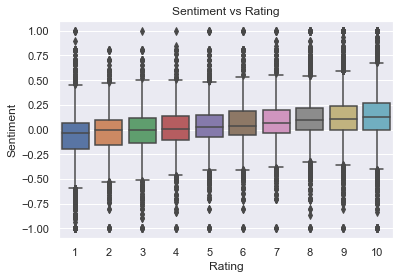

In [19]:
sns.boxplot(x=Reviews.rating,y=Reviews.sentiment)
plt.xlabel("Rating")
plt.ylabel("Sentiment")
plt.title("Sentiment vs Rating")
plt.show()

Looking at the boxplots above indeed there is a positive association between the rating and the sentiment score. This means that the relationship between rating and review sentiment, in general, is rather consisent and a review of high sentiment in many cases returns a high rating and vise versa.

### 2.3 Seasonality Importance

Now we would like to observe a seasonality effect. To do this lets examine the drug review rating across all the months. This could be interesting to see because if a good number of the drugs in our data are regarding usual illnesses, then maybe there could be differences in ratings because in some reasons individuals are sick more frequently. 

In [20]:
Reviews=pd.DataFrame(pysqldf("""SELECT *, CASE WHEN month in (12,1,2) THEN 'Winter'
                                                  WHEN month BETWEEN 9 AND 11 THEN 'Autumn'
                                                  WHEN month BETWEEN 6 and 8 THEN 'Summer'
                                                  WHEN month BETWEEN 3 AND 5 THEN 'Spring' END AS Season FROM Reviews"""))


In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('rating ~ Season',
                data=Reviews).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)


from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison


mc = MultiComparison(Reviews['rating'], Reviews['Season'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

                 sum_sq       df        F    PR(>F)
Season       265.889781      3.0  8.21542  0.000018
Residual  579997.419894  53762.0      NaN       NaN
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
Autumn Spring  0.1963   0.0938  0.2989  True 
Autumn Summer  0.0874  -0.0147  0.1895 False 
Autumn Winter  0.1141   0.0103  0.2179  True 
Spring Summer -0.1089  -0.2111 -0.0068  True 
Spring Winter -0.0822   -0.186  0.0217 False 
Summer Winter  0.0268  -0.0766  0.1302 False 
---------------------------------------------
['Autumn' 'Spring' 'Summer' 'Winter']


It looks like there are significant differences between most of the pairwise season drug ratings. However, looking at differences in ratings betwen Summer and Winter, there are not significant differences. The largest mean differences lies between Autumn and Spring noted by the confidence interval. Assuming that drug reviewers rated their drug within a relatively short amount of time from first usage, the reason that there could be significant differences in autumn and spring drug ratings is due the different enviornmental conditions that have brought distinct seasonality in the case of viral pathogens. 

### 2.4  Conditions With the Lowest Rating

Now we want to see what conditions have the lowest average rating for their relative drug. We think this may be important because some conditions may be naturally hard to treat and drugs may not be able to combat them, or it could be that drugs for certain conditions are prone to side effects that are bringing down ratings of the drug.

In [22]:
pd.DataFrame(pysqldf("""SELECT condition, AVG(rating) AS Rating FROM Reviews GROUP BY condition HAVING COUNT(*)>=200 ORDER BY 2 LIMIT 10"""))

,condition,Rating
0,Vaginal Yeast Infection,4.060419
1,Abnormal Uterine Bleeding,4.384259
2,Urinary Tract Infection,5.482599
3,Cough,5.929293
4,High Cholesterol,5.936893
5,Bacterial Infection,6.013029
6,Birth Control,6.042289
7,Sinusitis,6.083045
8,High Blood Pressure,6.136654
9,Overactive Bladde,6.158120


Looking at the table above, it's clear that a lot of the names of the conditions sound quite serious such as Breast Cancer, Urinary Tract Infection, and Abnormal Uterine Bleeding. These are the conditions that people rated the lowest for drugs.

Perhaps the most strikingly important information gained from this is that out of the bottom 10 conditions with the lowest ratings, a large portion of the conditions are much more common in females or they are body conditions exlusive for females. For example, Vaginal Yeast Infections,Abormal Uterine Bleeding, and Atrophic Vaginitis, are female conditions and others such as Breast Cancer, Osteoporosis, and urinary tract infection occur far more frequently in females than in males. This results we are seeing could be explained by females being more sensitive to drug side effects, increased difficulty to cure conditions in females by using drugs to combat them, or that males generally write more positive revies.


## (3) Topic Modeling

Topic modeling is a way to extract and summarize large quantities of text in order to extract insight of the main topics that textual information is about. What determines the topic of a given observation of text is the collection of words that is in the document. Algorithms that build topic models are able to extract key words that generalize each topic, and they also generally discover multiple topics within each document with relative proportions in each.

An example of the result of topic modeling can be understood as follows :

Consider having the following sentences that that describe drug reviews

-  I feel so sick and lightheaded after using this drug even for one day
-  The drug gave me a severe reaction and now I feel sick again
-  I am sleeping so much better now the drug really worked
-  My advice is taking this pill two hours before you sleep as it will go into effect later than you think
-  I was awake for 3 hours because of this drug it made me feel so sick I could not sleep

Topic modeling algorithms can give us results that would look like :

-  Sentence A and B are 100% Topic 1
-  Sentence C and D are 100% Topic 2
-  Sentence E is a mixture : 30% Topic 1 70% Topic 2

Basic steps for topic modeling consist of

-  Preprocessing the data
-  Training the model
-  Scoring it on a new document
-  Evaluate the performance


### 3.1 Latent Dirichlent Allocation (LDA)

Latent Dirichlent Allocation is a method that is commonly used for identifying topics for each document in a corpus. It is able to identify the topics present in a given document by analyzing the words in it and outputing a distribution of topics.

There are certain features LDA relies on to do its job. These are the features LDA uses to develop its topics

$ W $ :  Words appearing in a document

$ N : $  Words consist of N Words

$ M : $ Number of Documents

Some parameters are latent or inferred based on examining the corpus.

$ Z: $ Every word within each $ M_i $ in $ M $ is associated with a topic

$ \theta : $ topic distribution for document $ M_i $

In the end result of LDA, we generate a certain number of topics and within each topic there are a collection of words that have certain probabilities to pertain to that topic. Each word with a probability can be though of as "imortance". More relevant words pertianing to a topic are indicated by higher probabilities.

An example would be the following :

$ Topic 1 = P * word_1 + P * word_2 + P*word_3 +......P*word_n $

Where the number of words associated with each particular topic can be adjusted by the user.

As we just noted, the model requires certain rules and specifications (or hyperparameters) that a user can tune. These are parameters from a **Dirichlent Distribution**.

$ \alpha $ : This parameter sets the prior on the per document topic distribution. Lower $ \alpha $ indicates that a document consists of a few or one topic, and higher alphas will recognize multiple topics within a document. 

$ \beta $ : This parameter sets the perior for the word distribution per document. A low value of $ \beta $ means that a topic can be classified by just a few words rather than many.

The most significant question is perhaps how we select the number of topics for LDA to output. That is a task that can be supported by domain knowledge, or a user may have to test out certain values and observe if topic identifications make sense.

The LDA model will create a topic distribution per document so that the most likely class of topic can be identified per document. This is a task worth discovering, but there are other important uses for topic identifications.

Each document with its distribution of topics (probability belonging to each topic) can be considered to be a unique document that is seperable from other documents but also similar enough to grouped up with other documents. From this, we can identify a group of reviews that are similar to a particular review.

In [23]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

We will now form bigrams in our text corpus, which is the case of building n-grams with the case n=2. This would mean examining two pairs of words that frequently occur together (as determined by conditions and thresholds). We choose to include bigrams because this would mean identifying a common side effect or condition of two words (eg : panick attack) as one word being panick_attack. In turn, because we have simplified the text and concatenated words together into one word, our topic models will become more clear as we will see very soon. In addition, we could have considered trigrams as well which would locate groups of three words that frequently occur together. However, our word cloud insight and domain knowledge knowing that most health related conditions are expressed as two words, bigrams are sufficient enough at this point. 

In [24]:
# Bigrams here
bigrams = gensim.models.Phrases(tokenized_Review, min_count=5, threshold=100)
modelbigram = gensim.models.phrases.Phraser(bigrams)

def form_bigrams(texts):
    return [modelbigram[doc] for doc in texts]

data_with_bigrams = form_bigrams(tokenized_Review)

Now we build our corpus and a bag of words model for constructing a topic model.

In [25]:
dictionary = gensim.corpora.Dictionary(data_with_bigrams)
bow_corpus = [dictionary.doc2bow(doc) for doc in data_with_bigrams]

A preliminary question we must face is how many topics to consider for our topic model. To get an idea of whether we want to use a greater or less number of topics that outputs the most clear and relevant topics, we use a commmon measure of coherance score to evaluate each model and its number of topics. 

In [29]:
def get_coherance_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherences = []
    models = []
    for topic_num in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(bow_corpus,topic_num,dictionary)
        models.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherences.append(coherencemodel.get_coherence())

    return models, coherences

In [30]:
#This piece can take a while to run actually!
models, coherences = get_coherance_values(dictionary=dictionary, corpus=bow_corpus, texts=data_with_bigrams, start=2, limit=20, step=2)

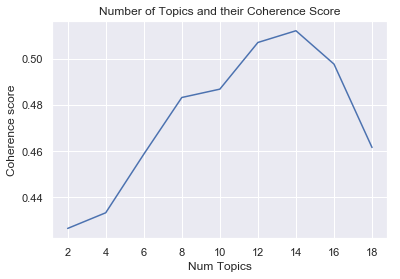

In [32]:
limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherences)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Number of Topics and their Coherence Score")
plt.show()

Since our coherance score is highest when the topic number is 14, we will use that for our final topic model. Note that coherance score alone may not neccacarily give the best results; topic quality and interpretibility should also be examined by a human to confirm if the topics make sense.

In [33]:
model_lda= gensim.models.ldamodel.LdaModel(bow_corpus, num_topics=14, id2word=dictionary, passes=1)

In [34]:
topics_num=model_lda.print_topics(-1)
for idx, topic in topics_num:
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.104*"pain" + 0.023*"back" + 0.014*"work" + 0.012*"relief" + 0.012*"severe" + 0.009*"surgery" + 0.008*"help" + 0.008*"chronic" + 0.007*"injection" + 0.007*"hour"
Topic: 1 
Words: 0.009*"went" + 0.009*"blood" + 0.008*"year" + 0.007*"told" + 0.007*"since" + 0.006*"test" + 0.006*"injection" + 0.006*"eye" + 0.006*"result" + 0.006*"allergy"
Topic: 2 
Words: 0.036*"work" + 0.024*"product" + 0.017*"itching" + 0.016*"burning" + 0.013*"hour" + 0.011*"insurance" + 0.010*"plan" + 0.008*"cost" + 0.008*"great" + 0.008*"expensive"
Topic: 3 
Words: 0.011*"symptom" + 0.010*"didn" + 0.010*"thought" + 0.010*"went" + 0.009*"anxiety" + 0.009*"nausea" + 0.008*"never" + 0.008*"even" + 0.007*"work" + 0.007*"body"
Topic: 4 
Words: 0.018*"quit" + 0.017*"chantix" + 0.013*"smoking" + 0.010*"pack" + 0.009*"cigarette" + 0.008*"smoke" + 0.008*"work" + 0.007*"since" + 0.007*"diagnosed" + 0.007*"depression"
Topic: 5 
Words: 0.036*"life" + 0.031*"anxiety" + 0.019*"depression" + 0.010*"much" + 0.009*"

Some of the topics that can be denoted by the importance of words pertaining to the topic are topics regarding depression/anxiety, skin products and their severe reactions on the face, period and birth control side effects, possible distruption of the circadian rhythms, energy and apetite symptoms. 

In [35]:
# Getting the Coherance score
CohLda = CoherenceModel(model=model_lda, texts=data_with_bigrams, dictionary=dictionary, coherence='c_v')
coherencelda = CohLda.get_coherence()
print('\nCoherence Score is.... ', coherencelda)


Coherence Score is....  0.4662423039046587


In [36]:
# Let's plot the visualization of topics
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_lda, bow_corpus, dictionary)
vis

C:\Users\Javacash\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.012134  0.109536       1        1  18.283237
5     -0.067332  0.035234       2        1  13.607766
13    -0.054779  0.070679       3        1   8.900460
0      0.067937 -0.059058       4        1   8.704998
10    -0.121424  0.031900       5        1   7.967616
3     -0.004100 -0.011665       6        1   7.472870
6      0.056663 -0.013163       7        1   6.541893
7     -0.095190 -0.095435       8        1   5.131413
11     0.084917  0.117201       9        1   4.816679
1      0.084204 -0.016645      10        1   4.685680
2      0.113766  0.154092      11        1   4.036625
9      0.185338 -0.185200      12        1   3.669608
8     -0.166749 -0.057920      13        1   3.193695
4     -0.071119 -0.079554      14        1   2.987458, topic_info=     Category          Freq           Term         Total  loglift  logprob
term                                                                      
153   Default  16091.000000           pain  16091.000000  30.0000  30.0000
113   Default  13383.000000         period  13383.000000  29.0000  29.0000
25    Default   9452.000000         weight   9452.000000  28.0000  28.0000
206   Default   4561.000000           skin   4561.000000  27.0000  27.0000
294   Default   5137.000000           acne   5137.000000  26.0000  26.0000
268   Default   6373.000000          sleep   6373.000000  25.0000  25.0000
166   Default   7432.000000          night   7432.000000  24.0000  24.0000
4     Default   8487.000000        anxiety   8487.000000  23.0000  23.0000
744   Default   3334.000000       migraine   3334.000000  22.0000  22.0000
14    Default   9384.000000           life   9384.000000  21.0000  21.0000
91    Default   5209.000000  birth_control   5209.000000  20.0000  20.0000
15    Default   4023.000000           lost   4023.000000  19.0000  19.0000
88    Default  13965.000000           work  13965.000000  18.0000  18.0000
129   Default   2584.000000           face   2584.000000  17.0000  17.0000
680   Default   7857.000000           hour   7857.000000  16.0000  16.0000
77    Default   2926.000000          pound   2926.000000  15.0000  15.0000
11    Default   3732.000000           gain   3732.000000  14.0000  14.0000
698   Default   3440.000000       bleeding   3440.000000  13.0000  13.0000
8     Default   5794.000000     depression   5794.000000  12.0000  12.0000
102   Default   5152.000000       headache   5152.000000  11.0000  11.0000
291   Default   1996.000000        product   1996.000000  10.0000  10.0000
99    Default   5252.000000        feeling   5252.000000   9.0000   9.0000
835   Default   1389.000000      infection   1389.000000   8.0000   8.0000
487   Default   4478.000000          cramp   4478.000000   7.0000   7.0000
404   Default   1892.000000          mouth   1892.000000   6.0000   6.0000
546   Default   2745.000000         gained   2745.000000   5.0000   5.0000
325   Default   5198.000000           dose   5198.000000   4.0000   4.0000
111   Default   4143.000000         nausea   4143.000000   3.0000   3.0000
998   Default   3701.000000        morning   3701.000000   2.0000   2.0000
766   Default   2335.000000       spotting   2335.000000   1.0000   1.0000
...       ...           ...            ...           ...      ...      ...
3805  Topic14    195.599380     clonazepam    236.785065   3.3197  -5.4784
2640  Topic14    196.905914        vitamin    257.979004   3.2406  -5.4718
2991  Topic14    120.818275      crippling    135.357254   3.3971  -5.9602
1     Topic14    185.394333           alot    254.243546   3.1949  -5.5320
16    Topic14    123.394417    mirtazapine    142.097656   3.3696  -5.9391
280   Topic14    184.989624          fully    293.411774   3.0495  -5.5342
1346  Topic14    448.578613           pack   1418.583252   2.3594  -4.6484
875   Topic14    184.078232     prednisone    293.942200   3.0427  -5.5391
2095  Topic14    2

Above is an interactive visualization of the topics and their corresponding words pertaining to each topic. Topics that are most present in the corpus are represented by larger circles, and smaller cirles are less frequent topics.

Better topic models will have their topics scattered throughout and not clustered in one region of the chart and very close to one another. Typically in that scenario we have too many topics that are redundant and are not providing distinction. In our case, we see a good number of topics with good seperation from each other, so we have build an appropriate baseline model! 

There are some overlap between topics but that is to be expected. For example, topics 11 and 9 are closely related and both contain discussions about skin. However, one topic forcuses on the seemingly positive and negative reactions for the drug used for skin and the other discusses more the cost, expensiveness, and insurance related problems of it. Topics 1 and 3 are closely related so we might be able to say that when women are experiencing cramps, periods, and birth control, they may also be discussing problems with their circadian rhythm.